# Clustering

In [109]:
import os
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

from math import ceil

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from esda.adbscan import ADBSCAN

In [111]:
!pwd

/home/jovyan/work/i2p/lectures


In [113]:
df = pd.read_csv(os.path.join('..','data','clean','2020-08-24-listings.csv.gz'))

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74120 entries, 0 to 74119
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            74120 non-null  int64  
 1   listing_url                                   74120 non-null  object 
 2   scrape_id                                     74120 non-null  int64  
 3   last_scraped                                  74120 non-null  object 
 4   name                                          74099 non-null  object 
 5   description                                   71314 non-null  object 
 6   picture_url                                   74120 non-null  object 
 7   host_id                                       74120 non-null  int64  
 8   host_url                                      74120 non-null  object 
 9   host_name                                     74120 non-null 

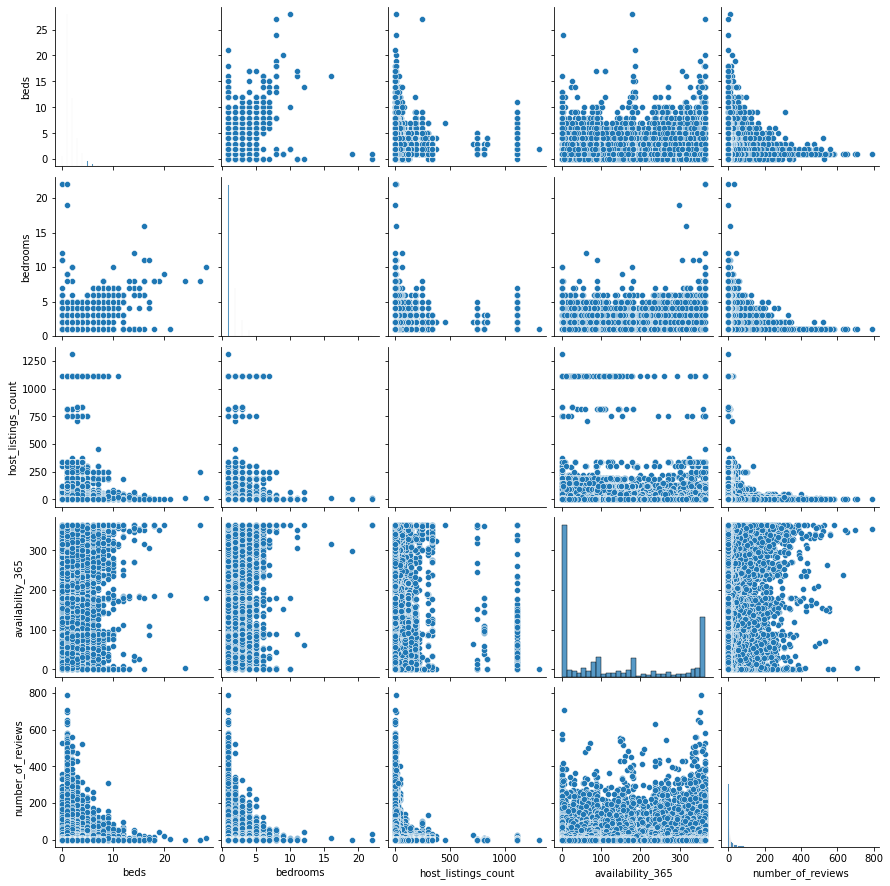

In [117]:
sns.pairplot(data=df[['beds','bedrooms','host_listings_count','availability_365','number_of_reviews']])

In [11]:
tfont = {'fontname':'Liberation Sans Narrow', 'horizontalalignment':'left'}

In [127]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler(quantile_range=(20.0, 80.0))
mm = MinMaxScaler()

In [119]:
to_cluster = df[['beds','bedrooms','host_listings_count','availability_365','number_of_reviews']].copy()
to_cluster.head()

,beds,bedrooms,host_listings_count,availability_365,number_of_reviews
0,3.0,1.0,3,236,192
1,0.0,1.0,4,364,21
2,1.0,1.0,1,359,89
3,3.0,3.0,18,1,42
4,1.0,1.0,3,364,0


In [135]:
normed = to_cluster.copy()
for c in to_cluster.columns.values:
    normed[c] = mm.fit_transform(rs.fit_transform(to_cluster[c].values.reshape(-1,1)))
    normed[c].fillna(0, inplace=True)
normed.head()

,beds,bedrooms,host_listings_count,availability_365,number_of_reviews
0,0.107143,0.000000,0.002292,0.646575,0.243038
1,0.000000,0.000000,0.003056,0.997260,0.026582
2,0.035714,0.000000,0.000764,0.983562,0.112658
3,0.107143,0.095238,0.013751,0.002740,0.053165
4,0.035714,0.000000,0.002292,0.997260,0.000000


In [136]:
for c in normed.columns.values:
    print(f"To cluster {c}: {to_cluster[c].max()}")
    print(f"Normed {c}: {normed[c].max()}")
    print()
    print(f"To cluster {c}: {to_cluster[c].min()}")
    print(f"Normed {c}: {normed[c].min()}")
    print()

To cluster beds: 28.0
Normed beds: 0.9999999999999999

To cluster beds: 0.0
Normed beds: 0.0

To cluster bedrooms: 22.0
Normed bedrooms: 1.0

To cluster bedrooms: 1.0
Normed bedrooms: 0.0

To cluster host_listings_count: 1309
Normed host_listings_count: 1.0

To cluster host_listings_count: 0
Normed host_listings_count: 0.0

To cluster availability_365: 365
Normed availability_365: 1.0

To cluster availability_365: 0
Normed availability_365: 0.0

To cluster number_of_reviews: 790
Normed number_of_reviews: 1.0

To cluster number_of_reviews: 0
Normed number_of_reviews: 0.0



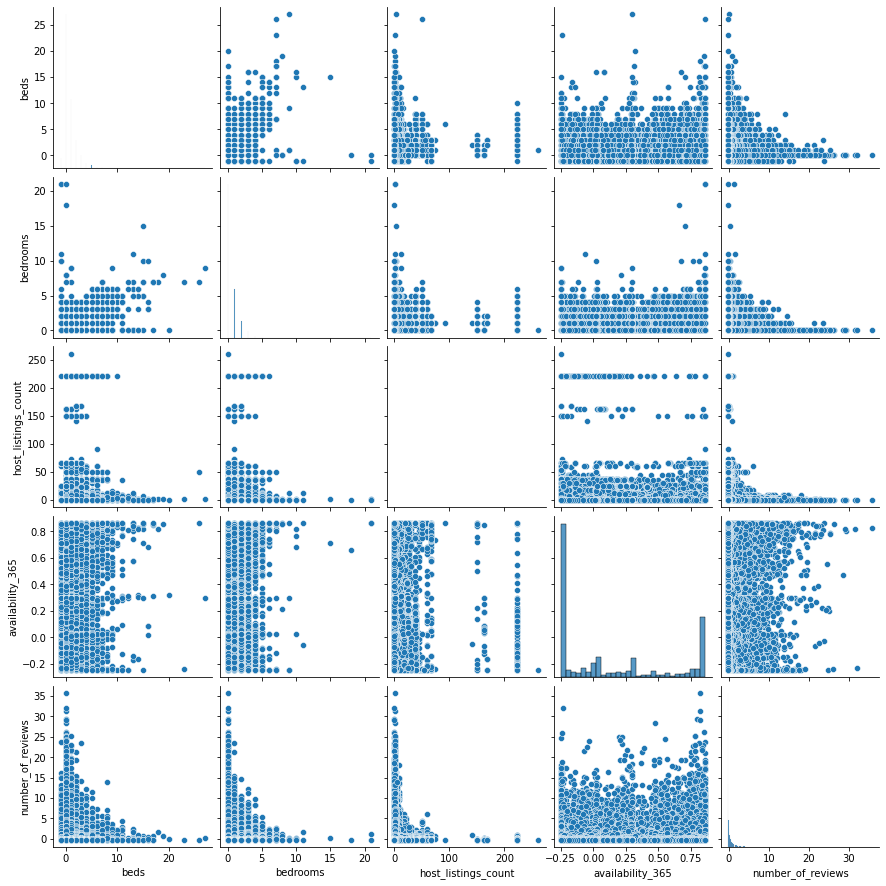

In [121]:
sns.pairplot(data=normed)

(0.0, 0.4)

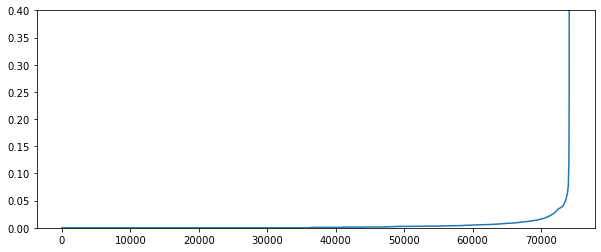

In [137]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='auto').fit(normed)
distances, indices = nbrs.kneighbors()

d = np.sort(distances, axis=0)
d = d[:,1]
plt.plot(d)
f = plt.gcf()
f.set_size_inches(10,4)
plt.ylim([0, 0.4]) # Look for max curvature

In [138]:
minPts = 25
epsilon = 0.05
dbsc = DBSCAN(eps=epsilon, min_samples=minPts)
dbsc.fit(normed)
clusters = dbsc.labels_

ppd['DBSCAN Cluster'] = clusters
ppd.plot(column='DBSCAN Cluster', categorical=True, legend=True, figsize=(12,8));

ValueError: Length of values (74120) does not match length of index (983)

In [142]:
print(len(dbsc.labels_))
(normed.shape[0] * normed.shape[1])

74120


370600